In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import  StandardScaler

df = pd.read_csv('customer_data_records.csv')


In [2]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

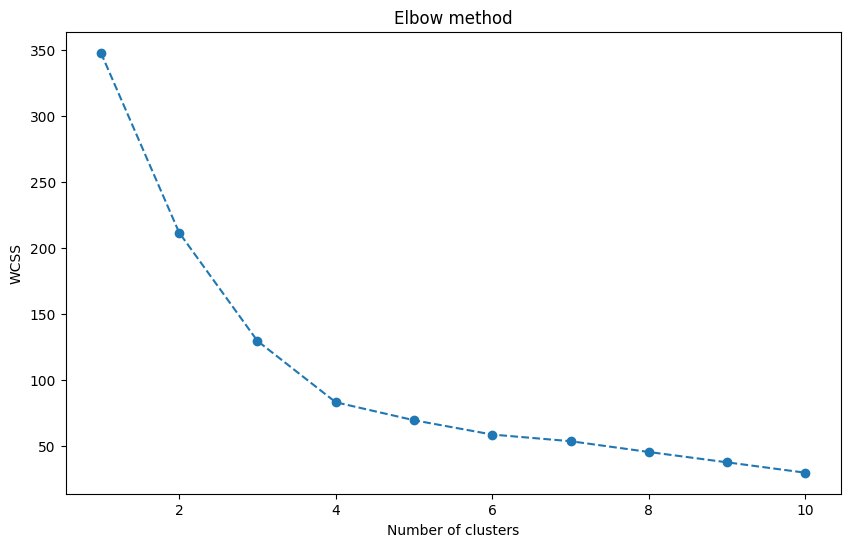

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

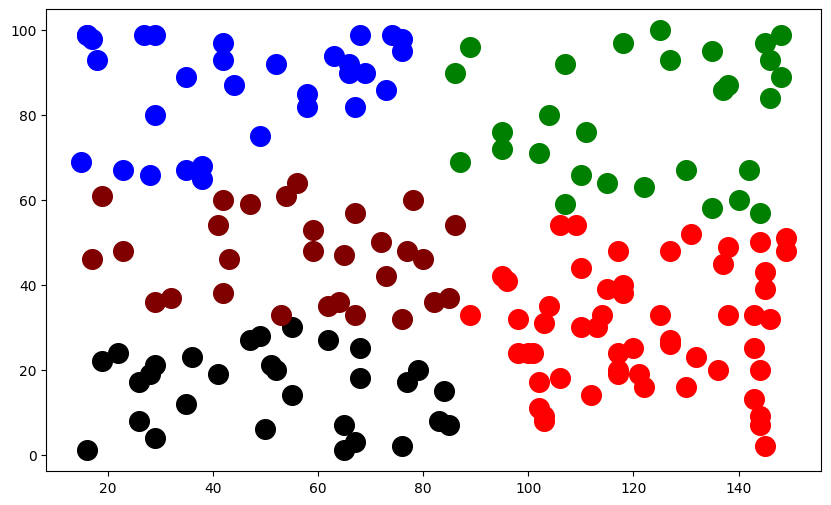

In [6]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'black', 'green', 'maroon']

for i in range(5):
    plt.scatter(
        df[df['Cluster'] == i]['Annual Income (k$)'], 
        df[df['Cluster'] == i]['Spending Score (1-100)'],
        s=200, c = colors[i], label= f'Cluster {i+1}'
    )

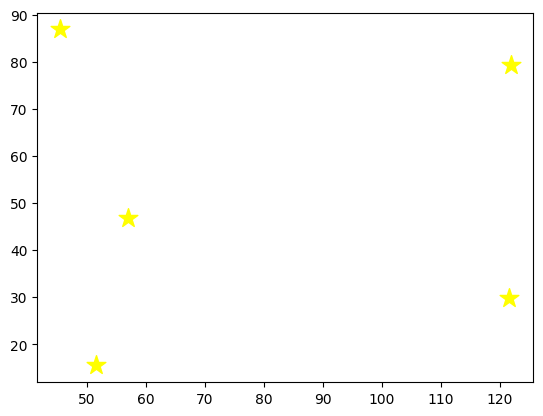

In [7]:
plt.scatter(
    kmeans.cluster_centers_[:, 0]*scaler.scale_[0] + scaler.mean_[0],
    kmeans.cluster_centers_[:, 1]*scaler.scale_[1] + scaler.mean_[1],
    s=200, c='yellow', marker='*', label='Centroids'
)

C:\Users\HP\AppData\Local\Temp\ipykernel_16400\1101225601.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


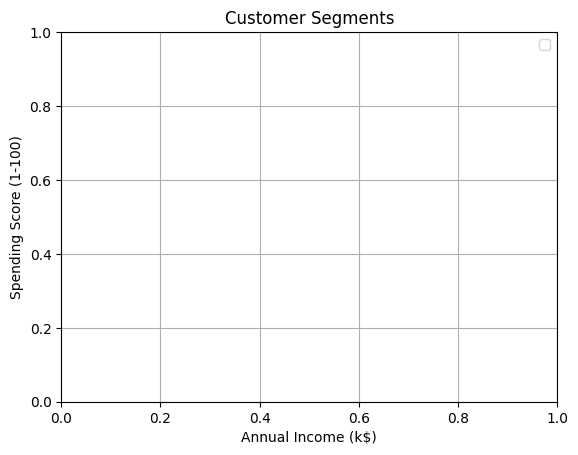

In [8]:
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()